In [91]:
import yfinance as yf

In [92]:
data = yf.download('SBIN.NS',period='5y')

[*********************100%***********************]  1 of 1 completed


In [93]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-06,300.600006,311.350006,300.600006,308.500000,295.243347,31576923
2018-08-07,309.850006,311.700012,303.049988,304.049988,290.984589,23928622
2018-08-08,304.049988,310.899994,303.049988,308.700012,295.434784,20498279
2018-08-09,312.950012,319.850006,310.149994,317.399994,303.760895,46464355
2018-08-10,317.649994,326.399994,300.500000,304.450012,291.367401,111510771


In [94]:
df = data[['Close']]
df.head()

,Close
Date,
2018-08-06,308.500000
2018-08-07,304.049988
2018-08-08,308.700012
2018-08-09,317.399994
2018-08-10,304.450012


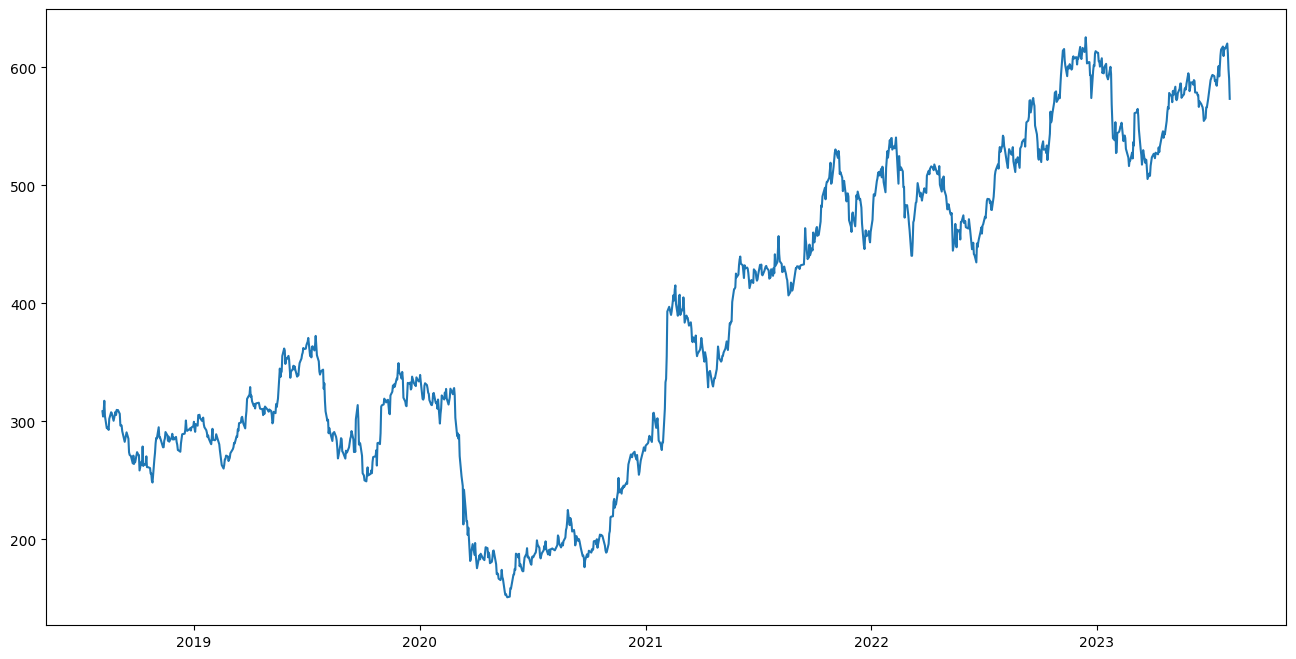

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()


In [96]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=['Close'])

In [97]:
df_scaled.index = df.index

In [98]:
df_scaled.head()

,Close
Date,
2018-08-06,0.332139
2018-08-07,0.322764
2018-08-08,0.332561
2018-08-09,0.350890
2018-08-10,0.323607


In [99]:
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
def prepare_data(df,lags):
    for i in range(lags):
        df[f'lag{i+1}']=df['Close'].shift(i+1)
    df = df.dropna(axis=0)
    X = df.iloc[:,1:]
    Y = df.iloc[:,0]
    return X,Y

In [101]:
X, Y = prepare_data(df_scaled,60)

In [102]:
X

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-06,0.303592,0.283367,0.284525,0.275045,0.257664,0.246603,0.204888,0.207943,0.220900,0.220794,...,0.330349,0.318656,0.298852,0.303487,0.301907,0.323607,0.350890,0.332561,0.322764,0.332139
2018-11-07,0.285684,0.303592,0.283367,0.284525,0.275045,0.257664,0.246603,0.204888,0.207943,0.220900,...,0.328979,0.330349,0.318656,0.298852,0.303487,0.301907,0.323607,0.350890,0.332561,0.322764
2018-11-09,0.285895,0.285684,0.303592,0.283367,0.284525,0.275045,0.257664,0.246603,0.204888,0.207943,...,0.319393,0.328979,0.330349,0.318656,0.298852,0.303487,0.301907,0.323607,0.350890,0.332561
2018-11-12,0.278942,0.285895,0.285684,0.303592,0.283367,0.284525,0.275045,0.257664,0.246603,0.204888,...,0.315180,0.319393,0.328979,0.330349,0.318656,0.298852,0.303487,0.301907,0.323607,0.350890
2018-11-13,0.267776,0.278942,0.285895,0.285684,0.303592,0.283367,0.284525,0.275045,0.257664,0.246603,...,0.331086,0.315180,0.319393,0.328979,0.330349,0.318656,0.298852,0.303487,0.301907,0.323607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,0.980091,0.981144,0.978195,0.966502,0.983462,0.978089,0.967450,0.949331,0.930159,0.948594,...,0.891920,0.917413,0.917413,0.908143,0.900242,0.890340,0.887707,0.890446,0.911724,0.896766
2023-08-01,0.988834,0.980091,0.981144,0.978195,0.966502,0.983462,0.978089,0.967450,0.949331,0.930159,...,0.893922,0.891920,0.917413,0.917413,0.908143,0.900242,0.890340,0.887707,0.890446,0.911724
2023-08-02,0.971242,0.988834,0.980091,0.981144,0.978195,0.966502,0.983462,0.978089,0.967450,0.949331,...,0.898136,0.893922,0.891920,0.917413,0.917413,0.908143,0.900242,0.890340,0.887707,0.890446


In [103]:
Y

Date
2018-11-06    0.285684
2018-11-07    0.285895
2018-11-09    0.278942
2018-11-12    0.267776
2018-11-13    0.267987
                ...   
2023-07-31    0.988834
2023-08-01    0.971242
2023-08-02    0.943011
2023-08-03    0.926261
2023-08-04    0.890024
Name: Close, Length: 1174, dtype: float64

In [104]:
n = int(0.8*len(X))
n

939

In [105]:
xtrain, ytrain = X[:n+1],Y[:n+1]
xtest, ytest = X[n:],Y[n:]

In [106]:
xtrain.shape

(940, 60)

In [107]:
xtest.shape

(235, 60)

In [108]:
from keras.models import Sequential     # same as ann
from keras.layers import LSTM, Dense, Dropout    #

In [109]:
nn = Sequential()
nn.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
nn.add(Dropout(0.2))
nn.add(LSTM(50,return_sequences=True))
nn.add(Dropout(0.2))
nn.add(LSTM(50))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation='linear'))

classification  - sigmoid    == binary
                  softmax   == Multiclass classificatoin

In [110]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [111]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [112]:
hist = nn.fit(xtrain,ytrain,
              epochs=30,
              batch_size=32)

Epoch 1/30
30/30 [==============================] - 20s 217ms/step - loss: 0.0475 - mae: 0.1624
Epoch 2/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0151 - mae: 0.0937
Epoch 3/30
30/30 [==============================] - 5s 164ms/step - loss: 0.0143 - mae: 0.0912
Epoch 4/30
30/30 [==============================] - 7s 230ms/step - loss: 0.0145 - mae: 0.0916
Epoch 5/30
30/30 [==============================] - 3s 105ms/step - loss: 0.0119 - mae: 0.0841
Epoch 6/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0103 - mae: 0.0786
Epoch 7/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0089 - mae: 0.0741
Epoch 8/30
30/30 [==============================] - 4s 129ms/step - loss: 0.0068 - mae: 0.0650
Epoch 9/30
30/30 [==============================] - 5s 157ms/step - loss: 0.0054 - mae: 0.0572
Epoch 10/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0054 - mae: 0.0577
Epoch 11/30
30/30 [==============================] -

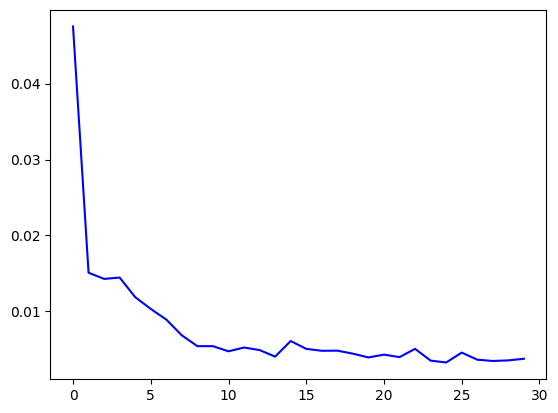

In [113]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],c='blue')

In [114]:
nn.evaluate(xtrain,ytrain)

30/30 [==============================] - 2s 31ms/step - loss: 0.0020 - mae: 0.0343


[0.001976830419152975, 0.034322623163461685]

In [115]:
nn.evaluate(xtest, ytest)

8/8 [==============================] - 0s 29ms/step - loss: 0.0082 - mae: 0.0787


[0.008211073465645313, 0.07865090668201447]

In [116]:
tr_pred = nn.predict(xtrain)

30/30 [==============================] - 3s 40ms/step


In [117]:
tr_pred = scaler.inverse_transform(tr_pred)

In [118]:
tr_pred

array([[271.1253 ],
       [273.67404],
       [276.24097],
       [278.5301 ],
       [280.36838],
       [282.16302],
       [284.2894 ],
       [286.40387],
       [288.7895 ],
       [290.7656 ],
       [292.1782 ],
       [293.7033 ],
       [294.67694],
       [295.74585],
       [296.8607 ],
       [297.39642],
       [297.91376],
       [298.1402 ],
       [298.4123 ],
       [298.21494],
       [297.70212],
       [296.699  ],
       [295.5783 ],
       [294.28024],
       [293.48843],
       [292.96112],
       [292.7004 ],
       [292.44678],
       [292.22977],
       [292.2804 ],
       [292.96634],
       [293.09256],
       [293.0248 ],
       [293.03177],
       [293.12772],
       [293.0531 ],
       [293.2064 ],
       [293.47983],
       [294.11353],
       [294.3269 ],
       [294.34854],
       [294.93484],
       [295.45532],
       [296.77725],
       [298.17233],
       [299.61514],
       [300.84372],
       [301.88474],
       [303.0324 ],
       [304.2669 ],


In [119]:

ytrain_org = scaler.inverse_transform([ytrain])

In [120]:

from sklearn.metrics import r2_score
r2_score(ytrain_org.flatten(), tr_pred.flatten())

0.9612768523286235

In [121]:



from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytrain_org.flatten(), tr_pred.flatten())
mse

445.3652524374817

In [122]:




mse**0.5

21.103678647038805

In [123]:



from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytrain_org.flatten(),tr_pred.flatten())
mae

16.291233728287068

Test Data Evaluation

In [124]:

ts_pred = nn.predict(xtest)

8/8 [==============================] - 0s 39ms/step


In [125]:
ts_pred = scaler.inverse_transform(ts_pred)

In [126]:
ts_pred = ts_pred.flatten()

In [127]:


ytest_org = scaler.inverse_transform([ytest]).flatten()

In [128]:
mean_absolute_error(ytest_org,ts_pred)

37.33165568899601

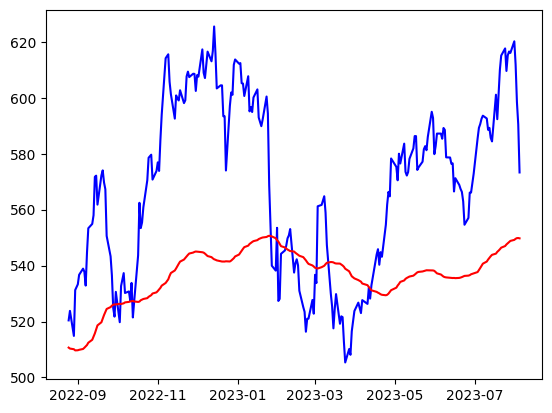

In [129]:
import matplotlib.pyplot as plt
plt.plot(ytest.index,ytest_org,c='blue')
plt.plot(ytest.index,ts_pred,c='red')

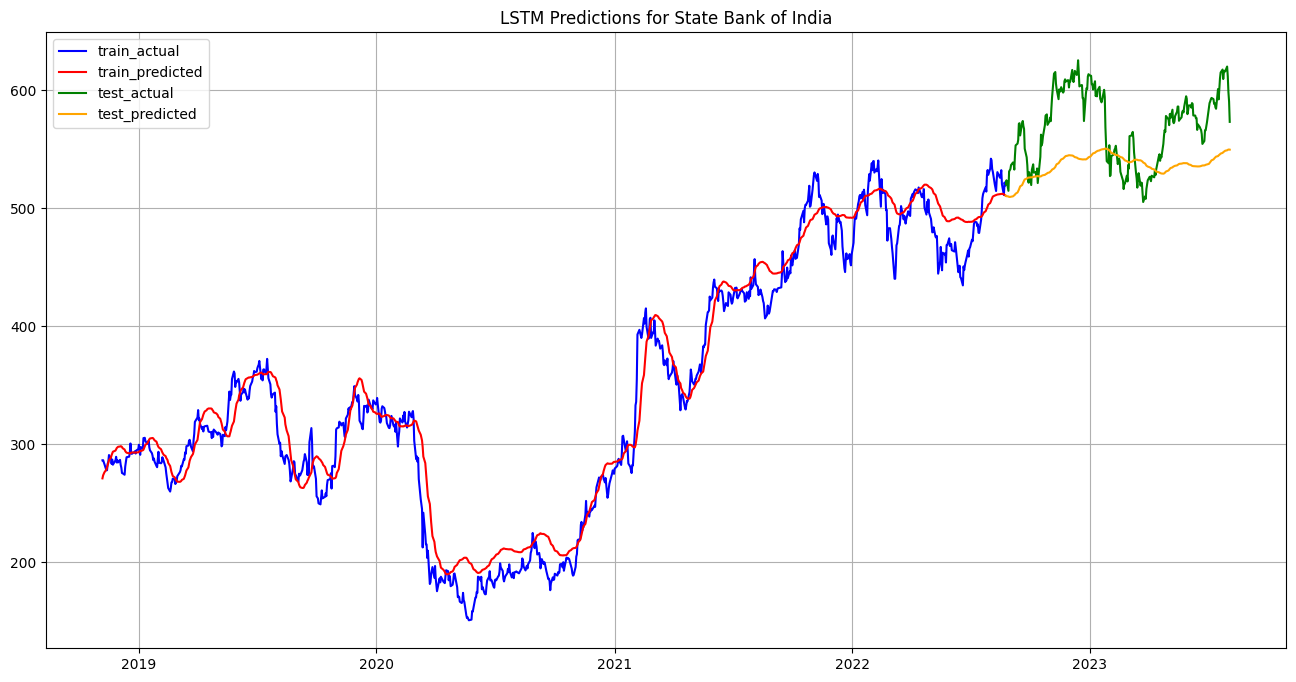

In [130]:
plt.figure(figsize=(16,8))
plt.plot(ytrain.index,ytrain_org.flatten(),c='blue',label='train_actual')
plt.plot(ytrain.index,tr_pred.flatten(),c='red',label='train_predicted')
plt.plot(ytest.index,ytest_org,c='green',label='test_actual')
plt.plot(ytest.index,ts_pred,c='orange',label='test_predicted')
plt.title('LSTM Predictions for State Bank of India')
plt.legend()
plt.grid()
plt.show()


,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


In [135]:
!mkdir -p ~/.kaggle
!cp kaggle(6).json ~/.kaggle/


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(6).json ~/.kaggle/'


In [137]:
!kaggle kernels pull shivamb/cnn-architectures-vgg-resnet-inception-tl

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
